In [84]:
import geopandas as gpd
import xarray as xr
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

from PIL import Image
from keras.utils.vis_utils import plot_model

In [47]:
NO_VALUES = -3.3999999521443642e+38

In [48]:
gdf = gpd.read_file('./data/test1/buffer05x05.shp')
gdf.head()

,CLASSE PRI,geometry
0,Soja,"POLYGON ((-45.83865 -12.80887, -45.83865 -12.8..."
1,Soja,"POLYGON ((-45.83788 -12.81815, -45.83788 -12.8..."
2,Soja,"POLYGON ((-45.84660 -12.81375, -45.84660 -12.8..."
3,Soja,"POLYGON ((-45.84722 -12.82869, -45.84722 -12.8..."
4,Soja,"POLYGON ((-45.85640 -12.82129, -45.85640 -12.8..."


In [49]:
PATH = "./data/test1/buffer/"
all_files = list()
all_tiffs = list()

for root, dirs, files in os.walk(PATH):
    for file in files:
        all_files.append(os.path.join(root, file))

all_files = np.asarray(all_files)
all_tiffs = np.asarray(list(filter(lambda x: x.endswith('.tif'), all_files)))

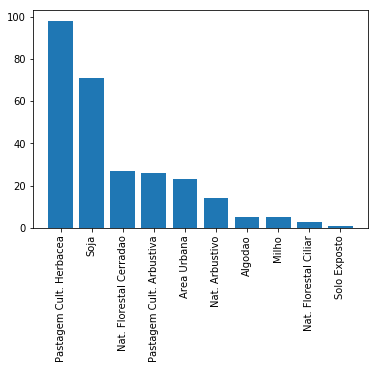

In [51]:
number_classes = {file.split(os.sep)[4] for file in all_tiffs}
number_classes = {key: 0 for key in number_classes}

for file in all_tiffs:
    number_classes[file.split(os.sep)[4]] += 1

number_classes = sorted(number_classes.items(), key=lambda item: item[1], reverse=True)
number_classes = {key: value for key, value in number_classes}
number_classes

_ = plt.bar(list(number_classes.keys()), list(number_classes.values()))
_ = plt.xticks(rotation=90)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


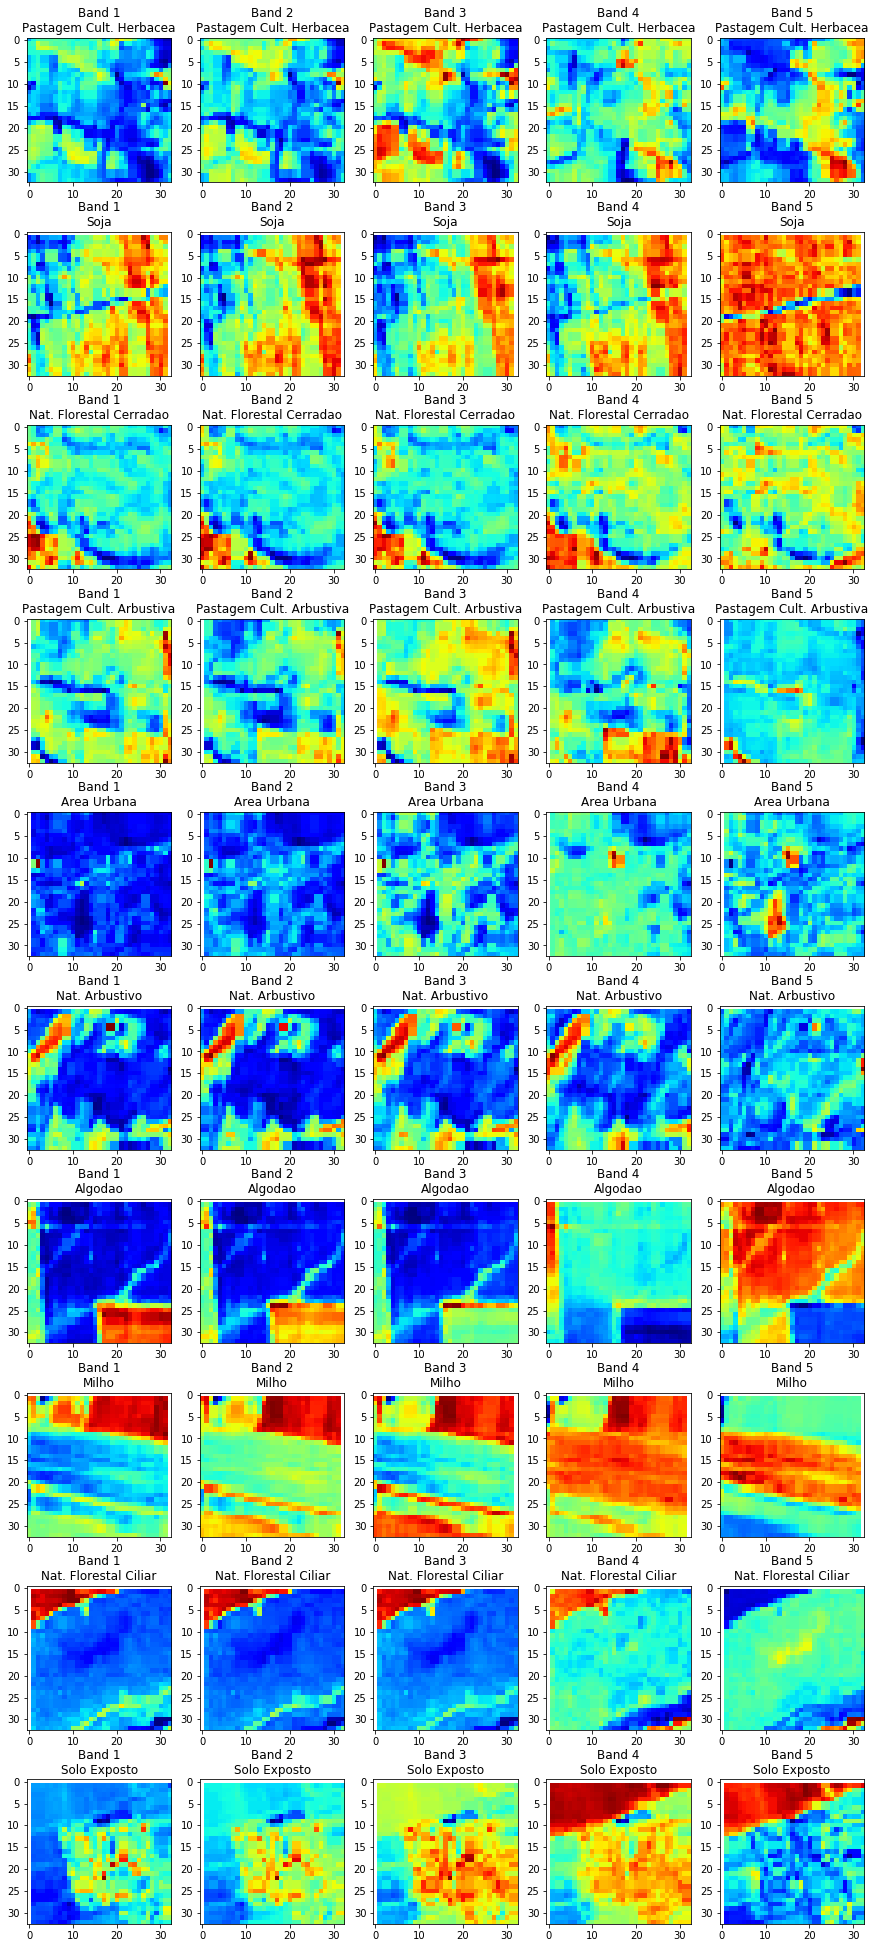

In [52]:
fig, ax = plt.subplots(10, 5, figsize=(15, 35))
idx = -1
linked_files = dict()
for i in range(10):
    idx+=1
    classe = list(number_classes.keys())[idx]
    temp = list(filter(lambda x: x.split(os.sep)[-4] == classe, all_tiffs))
    linked_files[classe] = temp
    nc = xr.open_rasterio(temp[0])
    for j in range(5):
        data = nc[j].data
        data[data == nc.nodatavals[0]] = np.nanmean(nc[j].data)
        ax[i][j].set_title('Band %d\n%s'%(j+1, classe))
        ax[i][j].imshow(data, cmap='jet')
plt.savefig('output/landcovers.png', dpi=100)

In [53]:
X = list()
Y = list()
for i, classe in enumerate(list(linked_files.keys())[:2]):
    for file in linked_files[classe]:
        data = xr.open_rasterio(file)
        NO = np.unique(data.nodatavals)[0]
        temp = list()
        for j in range(data.shape[0]):
            aux = data[j].data
            aux[aux == NO] = np.nan
            aux[np.isnan(aux)] = 0
            temp.append(aux)
            
        X.append(np.asarray(temp))
        Y.append(i)
X = np.asarray(X)
Y = np.asarray(Y)

In [65]:
Y = np_utils.to_categorical(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [67]:
shape = X_train.shape
X_trainr = X_train.reshape((shape[0], shape[2], shape[3], shape[1]))

shape = X_test.shape
X_testr = X_test.reshape((shape[0], shape[2], shape[3], shape[1]))

shape = X_trainr.shape
shape

(135, 33, 33, 5)

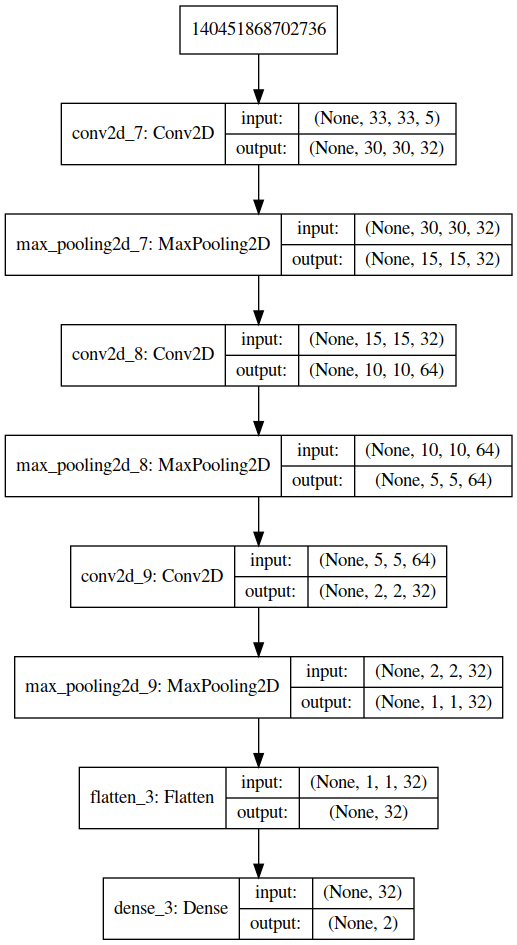

Train on 135 samples, validate on 34 samples
Epoch 1/100
135/135 [==============================] - 0s 3ms/step - loss: 5.7147 - acc: 0.6185 - val_loss: 4.8158 - val_acc: 0.7059
Epoch 2/100
135/135 [==============================] - 0s 554us/step - loss: 5.6052 - acc: 0.6519 - val_loss: 4.7151 - val_acc: 0.7059
Epoch 3/100
135/135 [==============================] - 0s 576us/step - loss: 5.5810 - acc: 0.6519 - val_loss: 4.7148 - val_acc: 0.7059
Epoch 4/100
135/135 [==============================] - 0s 539us/step - loss: 5.5809 - acc: 0.6519 - val_loss: 4.7148 - val_acc: 0.7059
Epoch 5/100
135/135 [==============================] - 0s 565us/step - loss: 5.5809 - acc: 0.6519 - val_loss: 4.7148 - val_acc: 0.7059
Epoch 6/100
135/135 [==============================] - 0s 563us/step - loss: 5.5809 - acc: 0.6519 - val_loss: 4.7148 - val_acc: 0.7059
Epoch 7/100
135/135 [==============================] - 0s 523us/step - loss: 5.5809 - acc: 0.6519 - val_loss: 4.7148 - val_acc: 0.7059
Epoch 8/100


Epoch 61/100
135/135 [==============================] - 0s 545us/step - loss: 5.5809 - acc: 0.6519 - val_loss: 4.7148 - val_acc: 0.7059
Epoch 62/100
135/135 [==============================] - 0s 478us/step - loss: 5.5809 - acc: 0.6519 - val_loss: 4.7148 - val_acc: 0.7059
Epoch 63/100
135/135 [==============================] - 0s 497us/step - loss: 5.5809 - acc: 0.6519 - val_loss: 4.7148 - val_acc: 0.7059
Epoch 64/100
135/135 [==============================] - 0s 527us/step - loss: 5.5809 - acc: 0.6519 - val_loss: 4.7148 - val_acc: 0.7059
Epoch 65/100
135/135 [==============================] - 0s 482us/step - loss: 5.5809 - acc: 0.6519 - val_loss: 4.7148 - val_acc: 0.7059
Epoch 66/100
135/135 [==============================] - 0s 495us/step - loss: 5.5809 - acc: 0.6519 - val_loss: 4.7148 - val_acc: 0.7059
Epoch 67/100
135/135 [==============================] - 0s 517us/step - loss: 5.5809 - acc: 0.6519 - val_loss: 4.7148 - val_acc: 0.7059
Epoch 68/100
135/135 [==========================

In [70]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(shape[1], shape[2], shape[3])))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(6, 6)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4, 4)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

history = model.fit(X_trainr, y_train, validation_data=(X_testr, y_test), epochs=100)

Text(0.5,1,'accuracy')

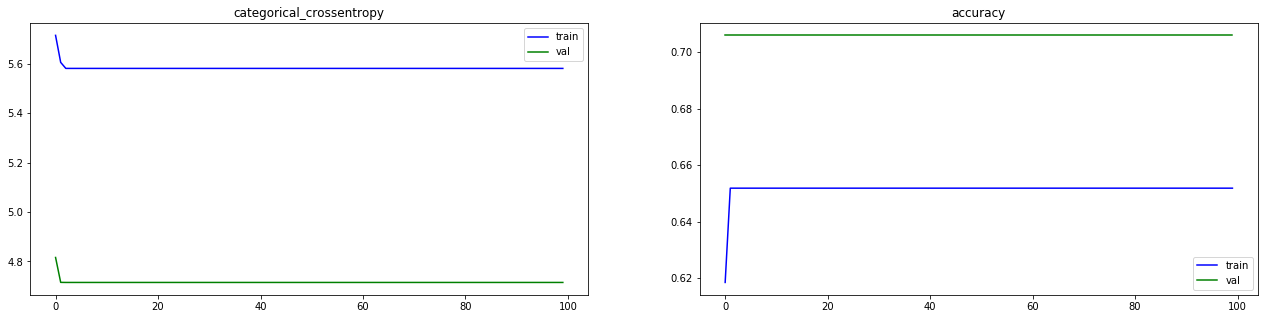

In [71]:
val_loss, loss = history.history['val_loss'], history.history['loss']
val_acc, acc = history.history['val_acc'], history.history['acc']
    
fig, ax = plt.subplots(1, 2, figsize=(22, 5))
ax[0].plot(loss, label='train', color='blue')
ax[0].plot(val_loss, label='val', color='green')
ax[0].legend()
ax[0].set_title('categorical_crossentropy')

ax[1].plot(acc, label='train', color='blue')
ax[1].plot(val_acc, label='val', color='green')
ax[1].legend()
ax[1].set_title('accuracy')

In [82]:
y_pred = model.predict_classes(X_testr)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

Text(0,0.5,'Ocorrências')

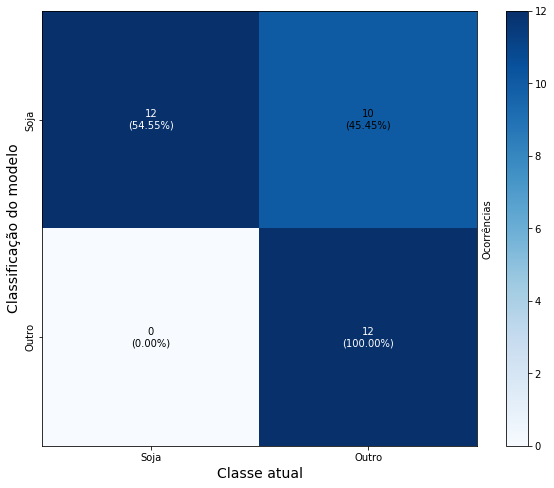

In [85]:
figsize = (15, 8)
fig, ax = plt.subplots(1, 1, figsize=figsize)

cmap = plt.cm.Blues
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.4)

total_samples = cm.sum(axis=1)[:, np.newaxis]
normed_conf_mat = cm.astype('float') / total_samples
labels = ['Soja', 'Outro']
label_font = dict(fontweight='normal', size=14)
title_font = dict(fontweight='normal', size=18)

matshow = ax.matshow(cm, cmap=cmap)
cb = plt.colorbar(matshow, cax=cax, orientation='vertical')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cell_text = str(cm[i, j])
        cell_text += '\n(%.2f%%)' % (normed_conf_mat[i, j] * 100)
        ax.text(x=j,
                y=i,
                s=cell_text,
                va='center',
                ha='center',
                color="white" if normed_conf_mat[i, j] > 0.5 else "black")

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels, rotation=90, va='center')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('Classe atual', fontdict=label_font)
ax.set_ylabel('Classificação do modelo', fontdict=label_font)
cb.ax.set_ylabel('Ocorrências', va='center', rotation=-270, labelpad=-60)